In [13]:
import pandas as pd

# Loading the dataset
df = pd.read_csv('zomato.csv')
df.head()


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [14]:
#Basic Exploration

In [19]:
# Shape of dataset
print("Rows * Columns",df.shape)
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])

Rows * Columns (51717, 17)
Rows: 51717
Columns: 17


In [16]:
# Column info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [17]:
# Check missing values
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [ ]:
#Data Cleaning & Preprocessing

In [21]:
# Fixing the rate Column
# Replacing 'NEW' and '–' with NaN
df['rate'] = df['rate'].replace(['NEW', '–'], pd.NA)

# Converting to numeric (ratings are generally floats)
df['rate'] = pd.to_numeric(df['rate'], errors='coerce')

# Checking if any nulls remain
df['rate'].isnull().sum()


51717

In [32]:
#Fixing the approx_cost(for two people) Column
# Step 1: Remove commas (e.g., "1,200" → "1200")
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].replace({',': ''}, regex=True)

# Step 2: Convert to numeric (float or int)
df['approx_cost(for two people)'] = pd.to_numeric(df['approx_cost(for two people)'], errors='coerce')




In [28]:
#Fixing Missing Values in Categorical Columns (rest_type, location, cuisines)
# Fill missing values with 'Unknown'
df['rest_type'] = df['rest_type'].fillna('Unknown')
df['location'] = df['location'].fillna('Unknown')
df['cuisines'] = df['cuisines'].fillna('Unknown')

# Verify
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                           51717
votes                              0
phone                           1208
location                           0
rest_type                          0
dish_liked                     28078
cuisines                           0
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [29]:
# Convert votes to Integer
# Convert 'votes' to numeric
df['votes'] = pd.to_numeric(df['votes'], errors='coerce')

# Verify
df['votes'].isnull().sum()


0

In [30]:
#Handle Duplicates
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicates: {duplicates}")

# Remove duplicates
df = df.drop_duplicates()


Number of duplicates: 0


In [31]:
#Saving Cleaned DataFrame
# Saving the cleaned data to a new CSV file
df.to_csv('cleaned_zomato.csv', index=False)


In [35]:
#Top Restaurant Locations in Bangalore
top_locations = df['location'].value_counts().head(10)
print(top_locations)

location
BTM                      5124
HSR                      2523
Koramangala 5th Block    2504
JP Nagar                 2235
Whitefield               2144
Indiranagar              2083
Jayanagar                1926
Marathahalli             1846
Bannerghatta Road        1630
Bellandur                1286
Name: count, dtype: int64


/var/folders/77/q6vgwmyx2lsd51zjjrmvsx9w0000gn/T/ipykernel_65233/2812537870.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.values, y=top_locations.index, palette='coolwarm')


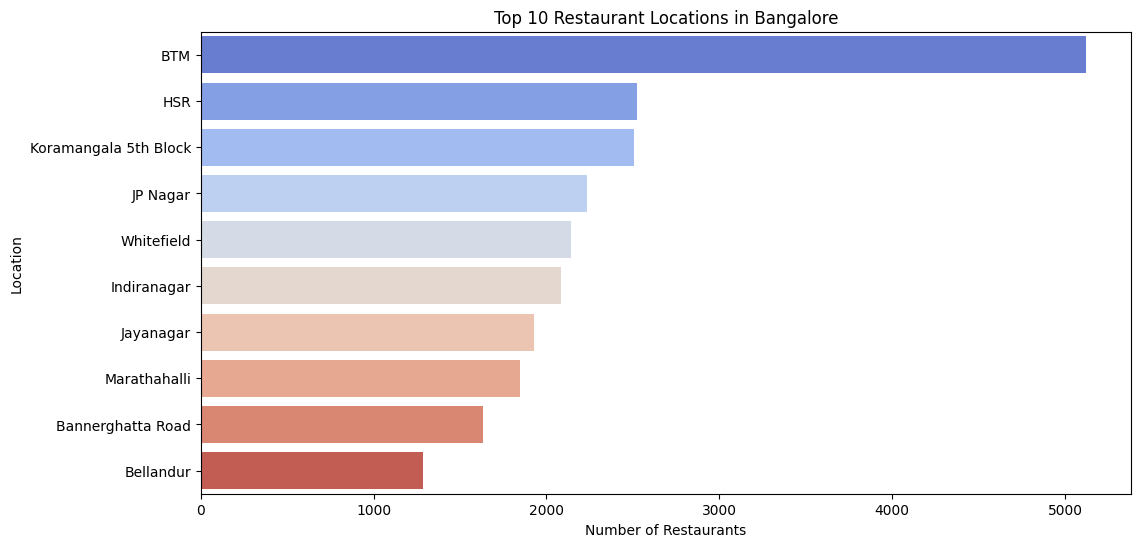

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(x=top_locations.values, y=top_locations.index, palette='coolwarm')
plt.title("Top 10 Restaurant Locations in Bangalore")
plt.xlabel("Number of Restaurants")
plt.ylabel("Location")
plt.show()

online_order
Yes    30444
No     21273
Name: count, dtype: int64


/var/folders/77/q6vgwmyx2lsd51zjjrmvsx9w0000gn/T/ipykernel_65233/976586788.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='online_order', data=df, palette='pastel')


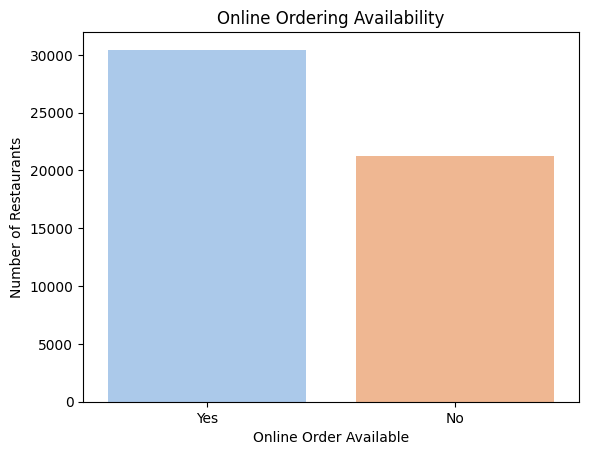

In [37]:
#Online Ordering Trends
online_order_counts = df['online_order'].value_counts()
print(online_order_counts)

# Plot
sns.countplot(x='online_order', data=df, palette='pastel')
plt.title("Online Ordering Availability")
plt.xlabel("Online Order Available")
plt.ylabel("Number of Restaurants")
plt.show()

/var/folders/77/q6vgwmyx2lsd51zjjrmvsx9w0000gn/T/ipykernel_65233/4094239698.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='book_table', data=df, palette='muted')


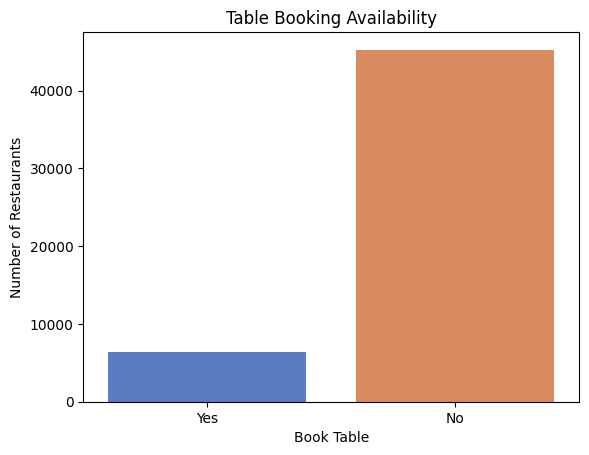

In [38]:
#Table Booking Trend
sns.countplot(x='book_table', data=df, palette='muted')
plt.title("Table Booking Availability")
plt.xlabel("Book Table")
plt.ylabel("Number of Restaurants")
plt.show()

/var/folders/77/q6vgwmyx2lsd51zjjrmvsx9w0000gn/T/ipykernel_65233/1643709378.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rest_types.values, y=rest_types.index, palette='Spectral')


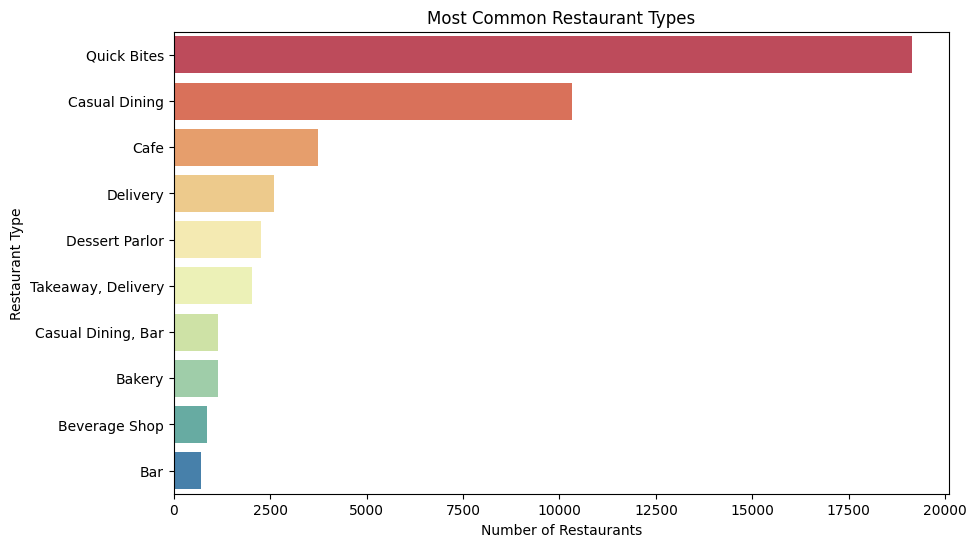

In [39]:
#Restaurant Types
rest_types = df['rest_type'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=rest_types.values, y=rest_types.index, palette='Spectral')
plt.title("Most Common Restaurant Types")
plt.xlabel("Number of Restaurants")
plt.ylabel("Restaurant Type")
plt.show()

/var/folders/77/q6vgwmyx2lsd51zjjrmvsx9w0000gn/T/ipykernel_65233/2775588236.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_cuisines.index, x=top_cuisines.values, palette='viridis')


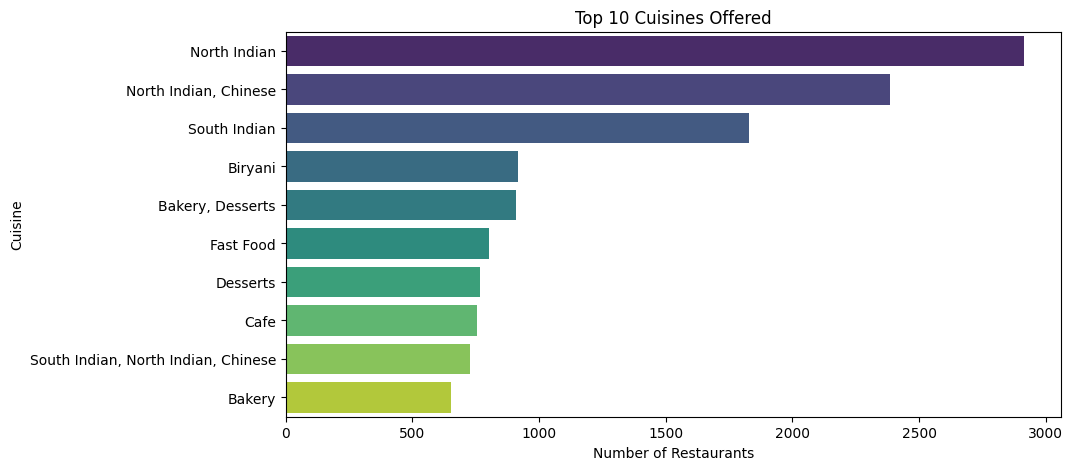

In [40]:
#Most Common Cuisines
top_cuisines = df['cuisines'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(y=top_cuisines.index, x=top_cuisines.values, palette='viridis')
plt.title("Top 10 Cuisines Offered")
plt.xlabel("Number of Restaurants")
plt.ylabel("Cuisine")
plt.show()

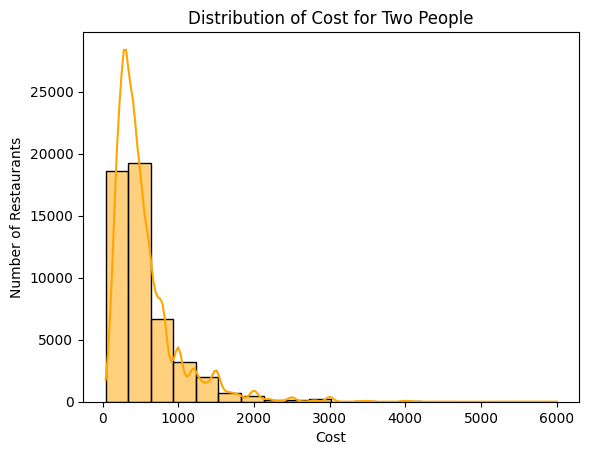

In [41]:
#Distribution of Cost for Two
sns.histplot(df['approx_cost(for two people)'], bins=20, kde=True, color='orange')
plt.title("Distribution of Cost for Two People")
plt.xlabel("Cost")
plt.ylabel("Number of Restaurants")
plt.show()

In [47]:
df.to_csv('Zomato_EDA.ipynb', index=False)



